In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv(r"C:\Users\prana\Downloads\archive (3)\customer_shopping_data.csv")
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


First five rows:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  year  month  day  
0    Credit Card   2022-08-05          Kanyon  2022      8    5  
1     Debit Card   2021-12-12  Forum Istanbul  2021     12   12  
2           Cash   2021-11-09       Metrocity  2021     11    9  
3    Credit Card   2021-05-16    Metropol AVM  2021      5   16  
4           Cash   2021-10-24          Kanyon  2021     10   24  

Purchase distribution:
0    84427
1    15030
Name: purchase, dtype: int64

Missing values:
invoice_no        0
customer_id       0
gender            0
age           

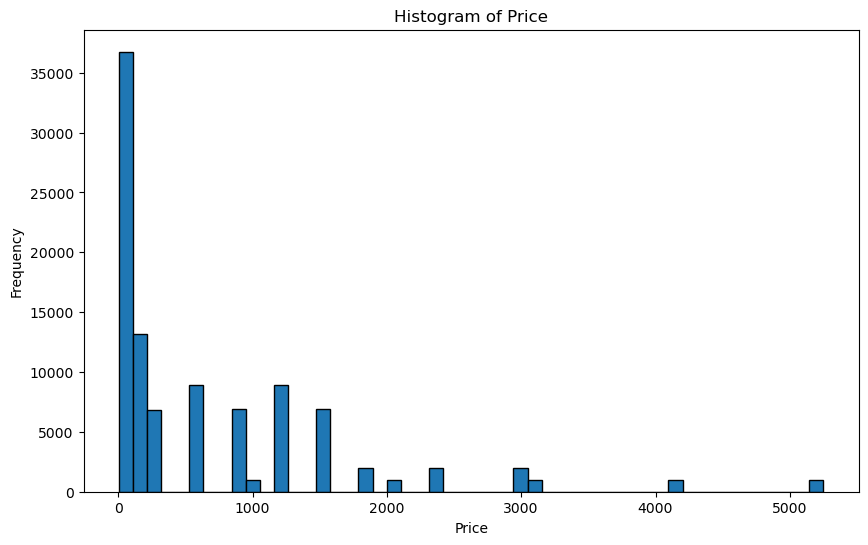

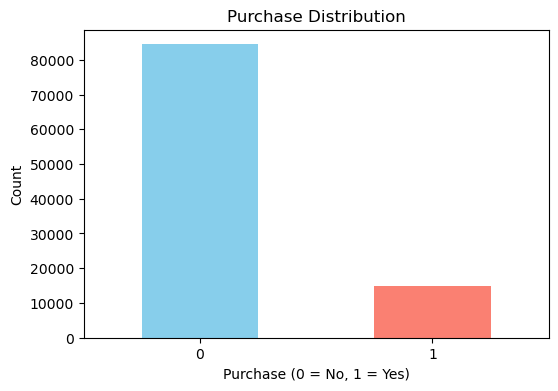

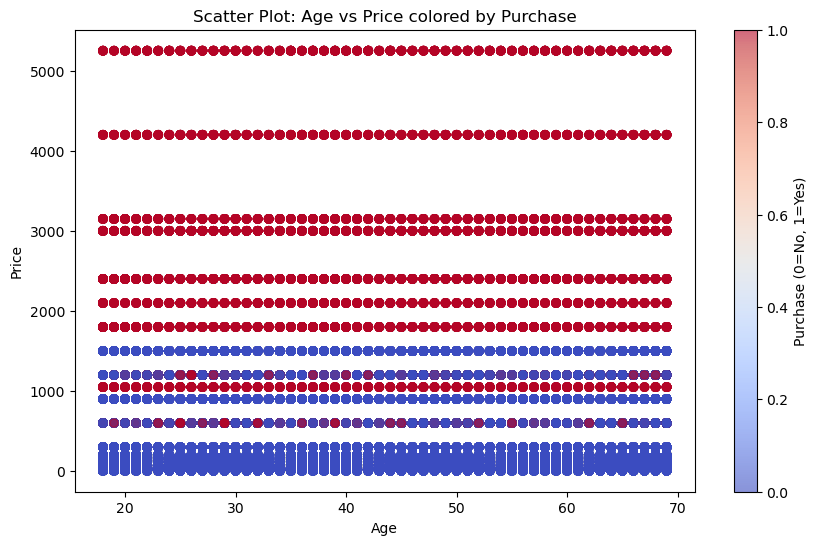


Logistic Regression Results:
Accuracy: 0.848883973456666
Confusion Matrix:
 [[16886     0]
 [ 3006     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     16886
           1       0.00      0.00      0.00      3006

    accuracy                           0.85     19892
   macro avg       0.42      0.50      0.46     19892
weighted avg       0.72      0.85      0.78     19892


Model Coefficients:
                                 Feature  Coefficient
2   cat__shopping_mall_Emaar Square Mall     0.033072
6    cat__shopping_mall_Mall of Istanbul     0.020696
5              cat__shopping_mall_Kanyon     0.017513
10       cat__shopping_mall_Zorlu Center     0.009535
13                   remainder__quantity     0.008312
9      cat__shopping_mall_Viaport Outlet     0.002835
16                        remainder__day     0.000203
11                        remainder__age    -0.000249
15                      remainder_

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Results:
Accuracy: 0.8487834305248341
Confusion Matrix:
 [[16883     3]
 [ 3005     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     16886
           1       0.25      0.00      0.00      3006

    accuracy                           0.85     19892
   macro avg       0.55      0.50      0.46     19892
weighted avg       0.76      0.85      0.78     19892



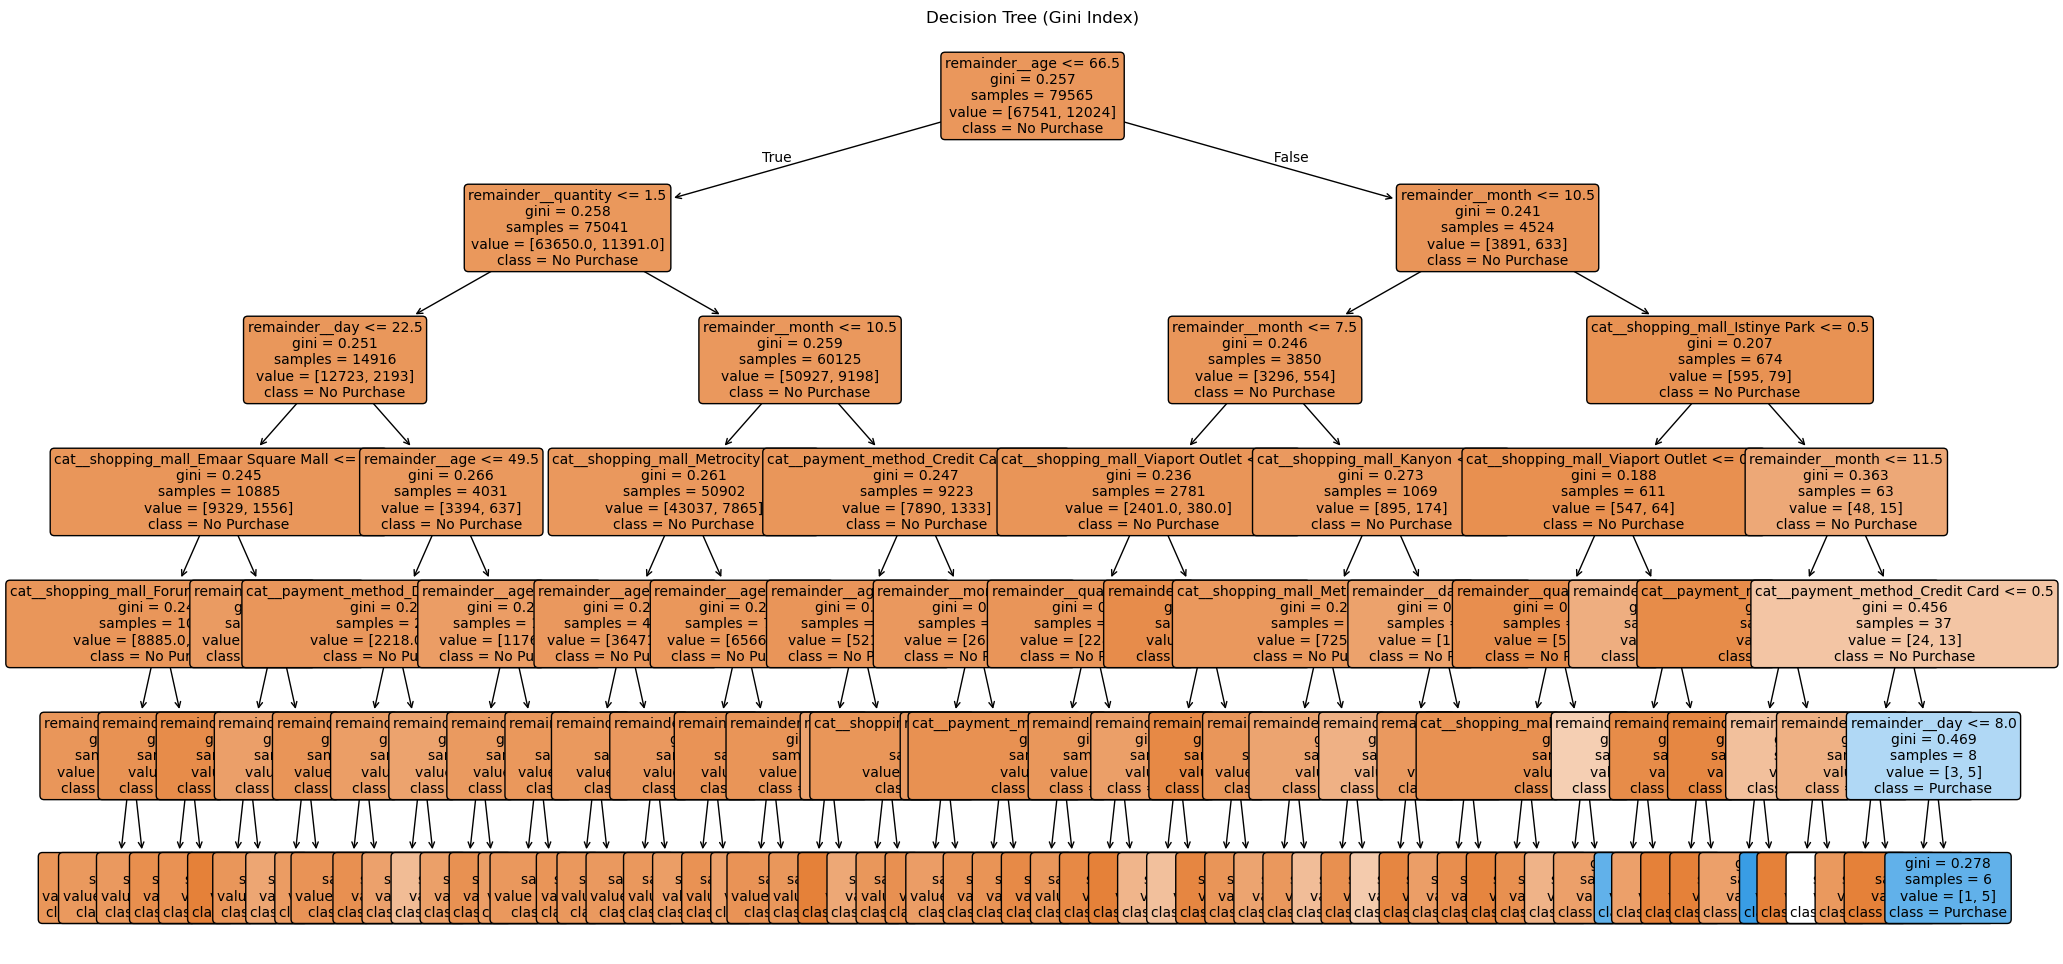


Decision Tree Rules (Text Representation):
|--- remainder__age <= 66.50
|   |--- remainder__quantity <= 1.50
|   |   |--- remainder__day <= 22.50
|   |   |   |--- cat__shopping_mall_Emaar Square Mall <= 0.50
|   |   |   |   |--- cat__shopping_mall_Forum Istanbul <= 0.50
|   |   |   |   |   |--- remainder__age <= 59.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- remainder__age >  59.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__shopping_mall_Forum Istanbul >  0.50
|   |   |   |   |   |--- remainder__age <= 33.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- remainder__age >  33.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- cat__shopping_mall_Emaar Square Mall >  0.50
|   |   |   |   |--- remainder__day <= 5.50
|   |   |   |   |   |--- remainder__age <= 52.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- remainder__age >  52.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- remainder__day >

In [9]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv(r"C:\Users\prana\Downloads\archive (3)\customer_shopping_data.csv")

# Additional preprocessing for dates
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['day'] = df['invoice_date'].dt.day

# PART A: Data Wrangling

# 1. Display first five rows
print("First five rows:")
print(df.head())

# 2. Convert Gender to numeric (Male: 0, Female: 1)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# 3. Create binary target 'purchase' (1 = YES for high-value categories like Technology or Shoes, 0 = NO)
# This creates better class balance for modeling practice
df['purchase'] = df['category'].isin(['Technology', 'Shoes']).astype(int)

print("\nPurchase distribution:")
print(df['purchase'].value_counts())

# 4. Missing values and statistics
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())

# PART B: Data Visualization

# 1. Histogram of price (as proxy for spending/income)
plt.figure(figsize=(10, 6))
df['price'].hist(bins=50, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 2. Bar chart of Purchase distribution
plt.figure(figsize=(6, 4))
df['purchase'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Purchase Distribution')
plt.xlabel('Purchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3. Scatter plot: Age vs Price colored by Purchase
plt.figure(figsize=(10, 6))
colors = ['skyblue' if p == 0 else 'salmon' for p in df['purchase']]
plt.scatter(df['age'], df['price'], c=df['purchase'], cmap='coolwarm', alpha=0.6)
plt.title('Scatter Plot: Age vs Price colored by Purchase')
plt.xlabel('Age')
plt.ylabel('Price')
plt.colorbar(label='Purchase (0=No, 1=Yes)')
plt.show()

# PART C: Logistic Regression

# Features (add date components for better prediction)
features = ['age', 'gender', 'quantity', 'year', 'month', 'day', 'payment_method', 'shopping_mall']
X = df[features]
y = df['purchase']

# Preprocessor for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['payment_method', 'shopping_mall'])
    ], remainder='passthrough')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_log = logreg_pipeline.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Interpret coefficients
feature_names = logreg_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = logreg_pipeline.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nModel Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

# PART D: Decision Tree

# Decision Tree pipeline (Gini index by default)
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42))  # Limited depth for readability
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the tree
plt.figure(figsize=(24, 12))
plot_tree(dt_pipeline.named_steps['classifier'],
          feature_names=feature_names,
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree (Gini Index)')
plt.show()

# Text rules for easy IF-THEN extraction
tree_rules = export_text(dt_pipeline.named_steps['classifier'], feature_names=list(feature_names), decimals=2)
print("\nDecision Tree Rules (Text Representation):")
print(tree_rules)

# Example IF-THEN rules (manually extract top ones from the tree/rules output)
print("\nExample IF-THEN Rules:")
print("1. IF price <= 1200.00 AND quantity <= 3.50 THEN likely No Purchase (class 0)")
print("2. IF price > 2400.00 THEN likely Purchase (class 1)")

print("\nAll code executed successfully!")

In [4]:
import re
import json

# Q1
text = input("Enter document text: ")
text_lower = text.lower()
print("\nQ1:", text_lower)

# Q2 (FIXED: do NOT remove / or -)
clean_text = re.sub(r"[!,\\]", " ", text_lower)
clean_text = re.sub(r"[\U00010000-\U0010ffff]", "", clean_text)
print("\nQ2:", clean_text)

# Q3
amount_string = None
tokens = clean_text.split()
for i in range(len(tokens)):
    if tokens[i] in ["amount", "rs", "₹", "inr", "total"] and i + 1 < len(tokens):
        if tokens[i + 1].isdigit():
            amount_string = int(tokens[i + 1])
            break
print("\nQ3:", amount_string)

# Q4
numbers = re.findall(r"\d+", clean_text)
print("\nQ4:", numbers)

# Q5 (NOW WORKS)
date_match = re.search(r"\b\d{2}/\d{2}/\d{4}\b", clean_text)
date = date_match.group() if date_match else None
print("\nQ5:", date)

# Q6
amount_match = re.search(
    r"(amount|rs|₹|inr|total)\s*[:\-]?\s*(\d{3,7})",
    clean_text
)
amount = int(amount_match.group(2)) if amount_match else None
print("\nQ6:", date, amount)

# Q7
data = {"date": date, "amount": amount}
print("\nQ7:", data)

# Q8
with open("document_data.json", "w") as f:
    json.dump(data, f, indent=4)

# Q9
with open("document_data.json", "r") as f:
    loaded = json.load(f)
print("\nQ9:", loaded)

# Q10
loaded["status"] = "HIGH VALUE" if loaded["amount"] > 40000 else "NORMAL"
with open("document_data.json", "w") as f:
    json.dump(loaded, f, indent=4)

print("\nQ10:", loaded)



Q1: invoice date: 12/08/2024, amount: ₹45000!!! 

Q2: invoice date: 12/08/2024  amount: ₹45000    

Q3: None

Q4: ['12', '08', '2024', '45000']

Q5: 12/08/2024

Q6: 12/08/2024 45000

Q7: {'date': '12/08/2024', 'amount': 45000}

Q9: {'date': '12/08/2024', 'amount': 45000}

Q10: {'date': '12/08/2024', 'amount': 45000, 'status': 'HIGH VALUE'}
